In [28]:
import pandas as pd

full_dataset_confounders_2014 = pd.read_csv('processed_data/full_dataset_confounders_2014.csv')
full_dataset_confounders_2015 = pd.read_csv('processed_data/full_dataset_confounders_2015.csv')
full_dataset_confounders_2016 = pd.read_csv('processed_data/full_dataset_confounders_2016.csv')


In [29]:
full_dataset_confounders_2014.set_index('osward', inplace=True)
full_dataset_confounders_2015.set_index('osward', inplace=True)
full_dataset_confounders_2016.set_index('osward', inplace=True)

In [36]:
full_dataset_confounders_2014_subset.total_count = full_dataset_confounders_2014_subset.total_count.astype('int')

In [33]:
full_dataset_confounders_2014_subset = full_dataset_confounders_2014.drop(['arts_count', 'cinema_count', 'gallery_count',
'comm_center_count', 'dance_count', 'lgbt_count', 'library_count', 'museum_count', 'music_count', 'outdoor_count',
'pub_count', 'skate_count', 'theatre_count', 'TOTAL_QUANTITY'], axis=1)

In [34]:
from sklearn.linear_model import LogisticRegression as lr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [4]:
import math
import numpy as np
import pandas as pd
# import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

In [38]:
T = full_dataset_confounders_2014_subset.total_count
X = full_dataset_confounders_2014_subset.loc[:,full_dataset_confounders_2014_subset.columns !='total_count']

In [46]:
y = full_dataset_confounders_2014[['TOTAL_QUANTITY']]

In [39]:
T

osward
E05000026    13
E05000027     1
E05000028     1
E05000029     7
E05000030     2
             ..
E05011485    11
E05011486     2
E05011487     4
E05011488     3
E05011489     4
Name: total_count, Length: 573, dtype: int32

In [40]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', lr())
])

pipe.fit(X, T)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression())])

In [41]:
predictions = pipe.predict_proba(X)
predictions_binary = pipe.predict(X)

In [42]:
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is:', metrics.f1_score(T, predictions_binary, average=None))

Accuracy: 0.1937

Confusion matrix:
[[ 0  1  5 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 [ 1  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]

F1 score is: [0.         0.         0.21940928 0.         0.26865672 0.30508475
 0.22641509 0.04444444 0.05882353 0.         0.08333333 0.15384615
 0.25       0.125      0.10810811 0.         0.         0.
 0.         0.         0.         0.         0.         0.4
 0.33333333 0.33333333 0.         0.         0.         0.
 0.         0.         1.         1.         0.         0.
 0.         0.         0.8        0.         0.         1.
 0.         0.         1.         0.66666667 1.         0.
 1.         1.         1.        ]


In [43]:
def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value


In [44]:
predictions_logit = np.array([logit(xi) for xi in predictions[:,1]])


C:\Users\muize\AppData\Local\Temp\ipykernel_8084\4112692049.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
C:\Users\muize\AppData\Local\Temp\ipykernel_8084\4112692049.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
C:\Users\muize\AppData\Local\Temp\ipykernel_8084\4112692049.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
C:\Users\muize\AppData\Local\Temp\ipykernel_8084\4112692049.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
C:\Users\muize\AppData\Local\Temp\ipyker

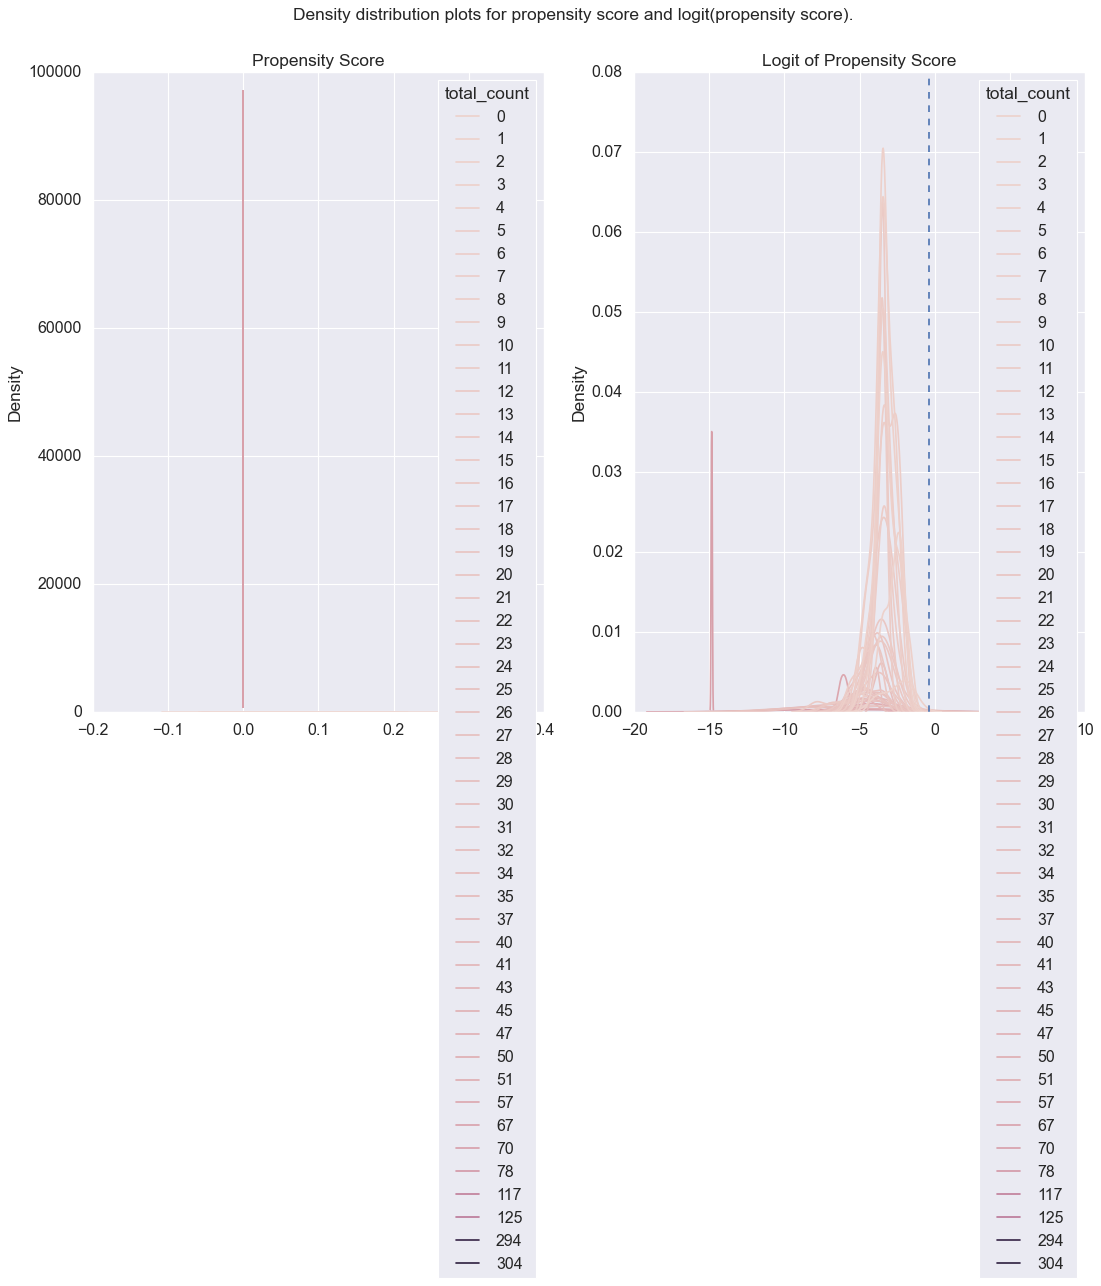

In [45]:
# Density distribution of propensity score (logic) broken down by treatment status
fig, ax = plt.subplots(1,2)
fig.suptitle('Density distribution plots for propensity score and logit(propensity score).')
sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
ax[0].set_title('Propensity Score')
sns.kdeplot(x = predictions_logit, hue = T , ax = ax[1])
ax[1].axvline(-0.4, ls='--')
ax[1].set_title('Logit of Propensity Score')
plt.show()

In [25]:
# Currently this does not affect the results as all observations fall within this range.
common_support = (predictions_logit > -10) & (predictions_logit < 10)

In [48]:
full_dataset_confounders_2014.loc[:,'propensity_score'] = predictions[:,1]
full_dataset_confounders_2014.loc[:,'propensity_score_logit'] = predictions_logit
full_dataset_confounders_2014.loc[:,'outcome'] = y.TOTAL_QUANTITY

X.loc[:,'propensity_score'] = predictions[:,1]
X.loc[:,'propensity_score_logit'] = predictions_logit
X.loc[:,'outcome'] = y.TOTAL_QUANTITY
X.loc[:,'treatment'] = full_dataset_confounders_2014.total_count

Matching implementation

In [49]:
caliper = np.std(full_dataset_confounders_2014.propensity_score) * 0.25

print('\nCaliper (radius) is: {:.4f}\n'.format(caliper))

df_data = X

knn = NearestNeighbors(n_neighbors=10 , p = 2, radius=caliper)
knn.fit(df_data[['propensity_score_logit']].to_numpy())


Caliper (radius) is: 0.0071



NearestNeighbors(n_neighbors=10, radius=0.007127404151311091)

In [50]:
# Common support distances and indexes
distances , indexes = knn.kneighbors(
    df_data[['propensity_score_logit']].to_numpy(), \
    n_neighbors=10)

In [51]:
print('For item 0, the 4 closest distances are (first item is self):')
for ds in distances[0,0:4]:
    print('Element distance: {:4f}'.format(ds))
print('...')

For item 0, the 4 closest distances are (first item is self):
Element distance: 0.000000
Element distance: 0.002804
Element distance: 0.002968
Element distance: 0.003808
...


In [52]:
print('For item 0, the 4 closest indexes are (first item is self):')
for idx in indexes[0,0:4]:
    print('Element index: {}'.format(idx))
print('...')

For item 0, the 4 closest indexes are (first item is self):
Element index: 0
Element index: 325
Element index: 162
Element index: 126
...


In [53]:
df_data

,"('Population and Age; Age structure (percentage) - 2013; Aged 0-15', 'Aged 0-15')","('Population and Age; Age structure (percentage) - 2013; Aged 16-64', 'Aged 16-64')","('Population and Age; Age structure (percentage) - 2013; Aged 65+', 'Aged 65+')","('Workplace employment; Number of Full-time employees; 2013', '2013')","('Workplace employment; Number of Part-time employees; 2013', '2013')","('Access to green space and nature; % area that is greenspace; 2014', '2014')","('Access to green space and nature; % homes with deficiency in access to nature; 2012', '2012')","('Benefits claimants; DWP Working-age client group (rates); 2014', '2014')","('Benefits claimants; Employment and support allowance claimants; 2014', '2014')","('Benefits claimants; Housing Benefit rates; 2014', '2014')","('Benefits claimants; Income Support Claimants; 2014', '2014')","('Benefits claimants; Incapacity Benefit Claimants; 2014', '2014')","('Jobseekers Allowance; JSA Claimant Rate; 2014', '2014')",propensity_score,propensity_score_logit,outcome,treatment
osward,,,,,,,,,,,,,,,,,
E05000026,25.274725,69.963370,5.128205,6300.0,3000.0,21.908601,2.164412,15.1,415.0,18.747475,255.0,75.0,6.236244,0.051713,-2.908946,101,13
E05000027,25.961538,63.461538,10.576923,500.0,500.0,20.621849,71.727362,20.7,490.0,19.271523,335.0,115.0,5.369551,0.072466,-2.549419,101,1
E05000028,24.896266,66.390041,9.128631,600.0,700.0,1.885448,17.166271,17.8,535.0,16.010204,290.0,105.0,5.981075,0.126171,-1.935249,153,1
E05000029,24.137931,60.591133,15.270936,1000.0,800.0,55.974507,63.592351,19.4,370.0,15.653333,265.0,85.0,5.201417,0.065433,-2.659060,154,7
E05000030,20.283019,65.094340,14.622642,3100.0,900.0,50.434179,0.000000,14.7,320.0,12.368098,185.0,70.0,4.638395,0.054014,-2.862991,127,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E05011485,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,108,11
E05011486,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,137,2
E05011487,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,194,4


In [58]:
df_data.reset_index().drop(['osward'], axis=1)

,"('Population and Age; Age structure (percentage) - 2013; Aged 0-15', 'Aged 0-15')","('Population and Age; Age structure (percentage) - 2013; Aged 16-64', 'Aged 16-64')","('Population and Age; Age structure (percentage) - 2013; Aged 65+', 'Aged 65+')","('Workplace employment; Number of Full-time employees; 2013', '2013')","('Workplace employment; Number of Part-time employees; 2013', '2013')","('Access to green space and nature; % area that is greenspace; 2014', '2014')","('Access to green space and nature; % homes with deficiency in access to nature; 2012', '2012')","('Benefits claimants; DWP Working-age client group (rates); 2014', '2014')","('Benefits claimants; Employment and support allowance claimants; 2014', '2014')","('Benefits claimants; Housing Benefit rates; 2014', '2014')","('Benefits claimants; Income Support Claimants; 2014', '2014')","('Benefits claimants; Incapacity Benefit Claimants; 2014', '2014')","('Jobseekers Allowance; JSA Claimant Rate; 2014', '2014')",propensity_score,propensity_score_logit,outcome,treatment
0,25.274725,69.963370,5.128205,6300.0,3000.0,21.908601,2.164412,15.1,415.0,18.747475,255.0,75.0,6.236244,0.051713,-2.908946,101,13
1,25.961538,63.461538,10.576923,500.0,500.0,20.621849,71.727362,20.7,490.0,19.271523,335.0,115.0,5.369551,0.072466,-2.549419,101,1
2,24.896266,66.390041,9.128631,600.0,700.0,1.885448,17.166271,17.8,535.0,16.010204,290.0,105.0,5.981075,0.126171,-1.935249,153,1
3,24.137931,60.591133,15.270936,1000.0,800.0,55.974507,63.592351,19.4,370.0,15.653333,265.0,85.0,5.201417,0.065433,-2.659060,154,7
4,20.283019,65.094340,14.622642,3100.0,900.0,50.434179,0.000000,14.7,320.0,12.368098,185.0,70.0,4.638395,0.054014,-2.862991,127,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,108,11
569,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,137,2
570,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,194,4
571,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,137,3


In [66]:
df_data = df_data.drop(['matched_element'], axis=1)

,"('Population and Age; Age structure (percentage) - 2013; Aged 0-15', 'Aged 0-15')","('Population and Age; Age structure (percentage) - 2013; Aged 16-64', 'Aged 16-64')","('Population and Age; Age structure (percentage) - 2013; Aged 65+', 'Aged 65+')","('Workplace employment; Number of Full-time employees; 2013', '2013')","('Workplace employment; Number of Part-time employees; 2013', '2013')","('Access to green space and nature; % area that is greenspace; 2014', '2014')","('Access to green space and nature; % homes with deficiency in access to nature; 2012', '2012')","('Benefits claimants; DWP Working-age client group (rates); 2014', '2014')","('Benefits claimants; Employment and support allowance claimants; 2014', '2014')","('Benefits claimants; Housing Benefit rates; 2014', '2014')","('Benefits claimants; Income Support Claimants; 2014', '2014')","('Benefits claimants; Incapacity Benefit Claimants; 2014', '2014')","('Jobseekers Allowance; JSA Claimant Rate; 2014', '2014')",propensity_score,propensity_score_logit,outcome,treatment
osward,,,,,,,,,,,,,,,,,
E05000026,25.274725,69.963370,5.128205,6300.0,3000.0,21.908601,2.164412,15.1,415.0,18.747475,255.0,75.0,6.236244,0.051713,-2.908946,101,13
E05000027,25.961538,63.461538,10.576923,500.0,500.0,20.621849,71.727362,20.7,490.0,19.271523,335.0,115.0,5.369551,0.072466,-2.549419,101,1
E05000028,24.896266,66.390041,9.128631,600.0,700.0,1.885448,17.166271,17.8,535.0,16.010204,290.0,105.0,5.981075,0.126171,-1.935249,153,1
E05000029,24.137931,60.591133,15.270936,1000.0,800.0,55.974507,63.592351,19.4,370.0,15.653333,265.0,85.0,5.201417,0.065433,-2.659060,154,7
E05000030,20.283019,65.094340,14.622642,3100.0,900.0,50.434179,0.000000,14.7,320.0,12.368098,185.0,70.0,4.638395,0.054014,-2.862991,127,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E05011485,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,108,11
E05011486,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,137,2
E05011487,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,194,4


In [106]:
df_data['index'] = range(0, len(df_data))

In [107]:
df_data['index']

osward
E05000026      0
E05000027      1
E05000028      2
E05000029      3
E05000030      4
            ... 
E05011485    568
E05011486    569
E05011487    570
E05011488    571
E05011489    572
Name: index, Length: 573, dtype: int64

In [109]:
def perfom_matching_v2(row, indexes, df_data):
    current_index = int(row['index'])
    prop_score_logit = row['propensity_score_logit']
    largest_differing_index = None
    largest_difference = 0
    print(indexes)
    for idx in indexes[current_index,:]:
        print(df_data.loc[idx].treatment)
        #print(abs(df_data.loc[idx].treatment - row.treatment))
        if abs(df_data.loc[idx].treatment - row.treatment) > largest_difference:
            largest_difference = abs(df_data.loc[idx].treatment - row.treatment)
            largest_differing_index = int(idx)
    return df_data.loc[largest_differing_index].osward
         
df_data['matched_element'] = df_data.apply(perfom_matching_v2, axis = 1, args = (indexes, df_data.set_index('index')))

[[  0 325 162 ... 221 327 386]
 [  1 367 220 ... 375  44 321]
 [  2   9 197 ... 393 202 379]
 ...
 [436 442 443 ... 448 445 456]
 [436 442 443 ... 448 445 456]
 [572 478 525 ... 448 446 456]]
13.0
4.0
6.0
1.0
3.0
5.0
3.0
7.0
1.0
8.0
[[  0 325 162 ... 221 327 386]
 [  1 367 220 ... 375  44 321]
 [  2   9 197 ... 393 202 379]
 ...
 [436 442 443 ... 448 445 456]
 [436 442 443 ... 448 445 456]
 [572 478 525 ... 448 446 456]]
1.0
11.0
4.0
5.0
7.0
16.0
4.0
4.0
6.0
1.0
[[  0 325 162 ... 221 327 386]
 [  1 367 220 ... 375  44 321]
 [  2   9 197 ... 393 202 379]
 ...
 [436 442 443 ... 448 445 456]
 [436 442 443 ... 448 445 456]
 [572 478 525 ... 448 446 456]]
1.0
3.0
3.0
0.0
1.0
12.0
0.0
6.0
1.0
8.0
[[  0 325 162 ... 221 327 386]
 [  1 367 220 ... 375  44 321]
 [  2   9 197 ... 393 202 379]
 ...
 [436 442 443 ... 448 445 456]
 [436 442 443 ... 448 445 456]
 [572 478 525 ... 448 446 456]]
7.0
4.0
6.0
6.0
3.0
6.0
10.0
4.0
2.0
14.0
[[  0 325 162 ... 221 327 386]
 [  1 367 220 ... 375  44 321]
 [  

In [110]:
df_data.matched_element

osward
E05000026    126
E05000027    115
E05000028    387
E05000029    385
E05000030    390
            ... 
E05011485    453
E05011486    453
E05011487    453
E05011488    453
E05011489    456
Name: matched_element, Length: 573, dtype: int64

In [103]:
for index, row in df_data.reset_index().iterrows():
    if index > 0:
        perfom_matching_v2(row, indexes, df_data)

[[  0 325 162 ... 221 327 386]
 [  1 367 220 ... 375  44 321]
 [  2   9 197 ... 393 202 379]
 ...
 [436 442 443 ... 448 445 456]
 [436 442 443 ... 448 445 456]
 [572 478 525 ... 448 446 456]]


KeyError: 2

In [62]:
df_data

,"('Population and Age; Age structure (percentage) - 2013; Aged 0-15', 'Aged 0-15')","('Population and Age; Age structure (percentage) - 2013; Aged 16-64', 'Aged 16-64')","('Population and Age; Age structure (percentage) - 2013; Aged 65+', 'Aged 65+')","('Workplace employment; Number of Full-time employees; 2013', '2013')","('Workplace employment; Number of Part-time employees; 2013', '2013')","('Access to green space and nature; % area that is greenspace; 2014', '2014')","('Access to green space and nature; % homes with deficiency in access to nature; 2012', '2012')","('Benefits claimants; DWP Working-age client group (rates); 2014', '2014')","('Benefits claimants; Employment and support allowance claimants; 2014', '2014')","('Benefits claimants; Housing Benefit rates; 2014', '2014')","('Benefits claimants; Income Support Claimants; 2014', '2014')","('Benefits claimants; Incapacity Benefit Claimants; 2014', '2014')","('Jobseekers Allowance; JSA Claimant Rate; 2014', '2014')",propensity_score,propensity_score_logit,outcome,treatment,matched_element
osward,,,,,,,,,,,,,,,,,,
E05000026,25.274725,69.963370,5.128205,6300.0,3000.0,21.908601,2.164412,15.1,415.0,18.747475,255.0,75.0,6.236244,0.051713,-2.908946,101,13,NaN
E05000027,25.961538,63.461538,10.576923,500.0,500.0,20.621849,71.727362,20.7,490.0,19.271523,335.0,115.0,5.369551,0.072466,-2.549419,101,1,NaN
E05000028,24.896266,66.390041,9.128631,600.0,700.0,1.885448,17.166271,17.8,535.0,16.010204,290.0,105.0,5.981075,0.126171,-1.935249,153,1,NaN
E05000029,24.137931,60.591133,15.270936,1000.0,800.0,55.974507,63.592351,19.4,370.0,15.653333,265.0,85.0,5.201417,0.065433,-2.659060,154,7,NaN
E05000030,20.283019,65.094340,14.622642,3100.0,900.0,50.434179,0.000000,14.7,320.0,12.368098,185.0,70.0,4.638395,0.054014,-2.862991,127,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E05011485,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,108,11,NaN
E05011486,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,137,2,NaN
E05011487,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.029621,-3.489193,194,4,NaN
